In [ ]:
import sys
sys.path.append("..")
from enhancer import *
from enhancer.options import *
from enhancer.data import * 
from enhancer.utils import *
%load_ext autoreload
%autoreload 2

In [2]:
torch.backends.cudnn.benchmark = True

In [1]:
opt_path = "../configs/smallmodel/mse_train.yml"
dataloaders = get_dataloader_from_yml(opt_path)
pipeline =load_pipeline_from_yml(opt_path)

NameError: name 'get_dataloader_from_yml' is not defined

In [20]:
batch_example = getsample(pipeline["loaders"]["train_dataloader"])

In [21]:
pipeline["generator"](batch_example["lr"].to(device)).shape

torch.Size([64, 3, 128, 128])

In [22]:
batch_example["lr"].shape,batch_example["hr"].shape

(torch.Size([64, 3, 64, 64]), torch.Size([64, 3, 128, 128]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


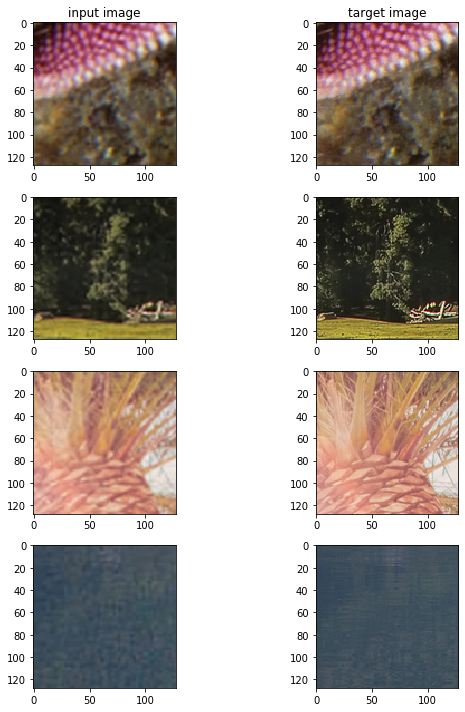

In [24]:
batch_versus_plot(
    batch_example["lr"],
    batch_example["hr"],
    preupscaling=True,
    figsize = (10,10),
    denormalize=False,
    batch_limit = 4
)

In [25]:
torch.autograd.set_detect_anomaly(True)

In [ ]:
pipeline["trainer"].train_model(1,1000)